In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("salaries.csv")
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [9]:
df.shape

(13972, 11)

In [11]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,13972.000000,1.397200e+04,13972.000000,13972.000000
mean,2023.085600,1.660011e+05,150028.812124,33.334526
std,0.687612,3.661545e+05,68634.306349,46.682931
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103000.000000,0.000000
50%,2023.000000,1.422000e+05,141600.000000,0.000000
75%,2024.000000,1.880000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [13]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [17]:
# Checking the unique values in categorical columns
print("\nUnique values in categorical columns:-")
for column in df.select_dtypes(include='object'):
    print(f"\n{column}: {df[column].unique()}")


Unique values in categorical columns:-

experience_level: ['SE' 'MI' 'EN' 'EX']

employment_type: ['FT' 'CT' 'PT' 'FL']

job_title: ['AI Engineer' 'Machine Learning Engineer'
 'Business Intelligence Developer' 'Data Engineer' 'Data Scientist'
 'Cloud Database Engineer' 'Research Engineer' 'Data Analyst'
 'Machine Learning Scientist' 'Applied Scientist' 'Data Science Manager'
 'Research Scientist' 'Prompt Engineer' 'Data Science'
 'Data Science Consultant' 'Data Management Analyst' 'Research Analyst'
 'Data Operations Analyst' 'Data Management Consultant'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Data Quality Analyst' 'Data Architect' 'Data Manager' 'ML Engineer'
 'Robotics Software Engineer' 'Machine Learning Researcher' 'AI Architect'
 'Data DevOps Engineer' 'Business Intelligence' 'AI Software Engineer'
 'Data Integration Engineer' 'Data Operations Specialist' 'BI Analyst'
 'Data Product Manager' 'Business Intelligence Engineer' 'Data Specialist'
 'AI Research Scientis

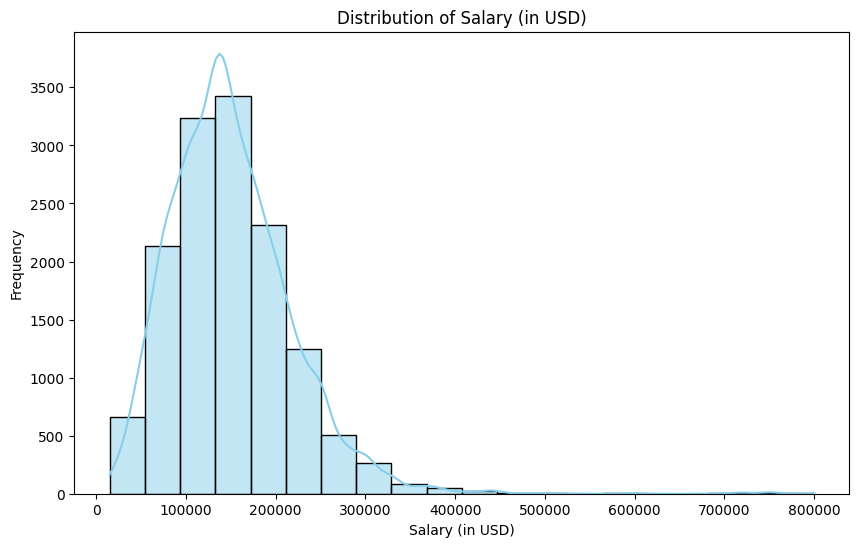

In [21]:
# Distribution of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Salary (in USD)')
plt.xlabel('Salary (in USD)')
plt.ylabel('Frequency')
plt.show()

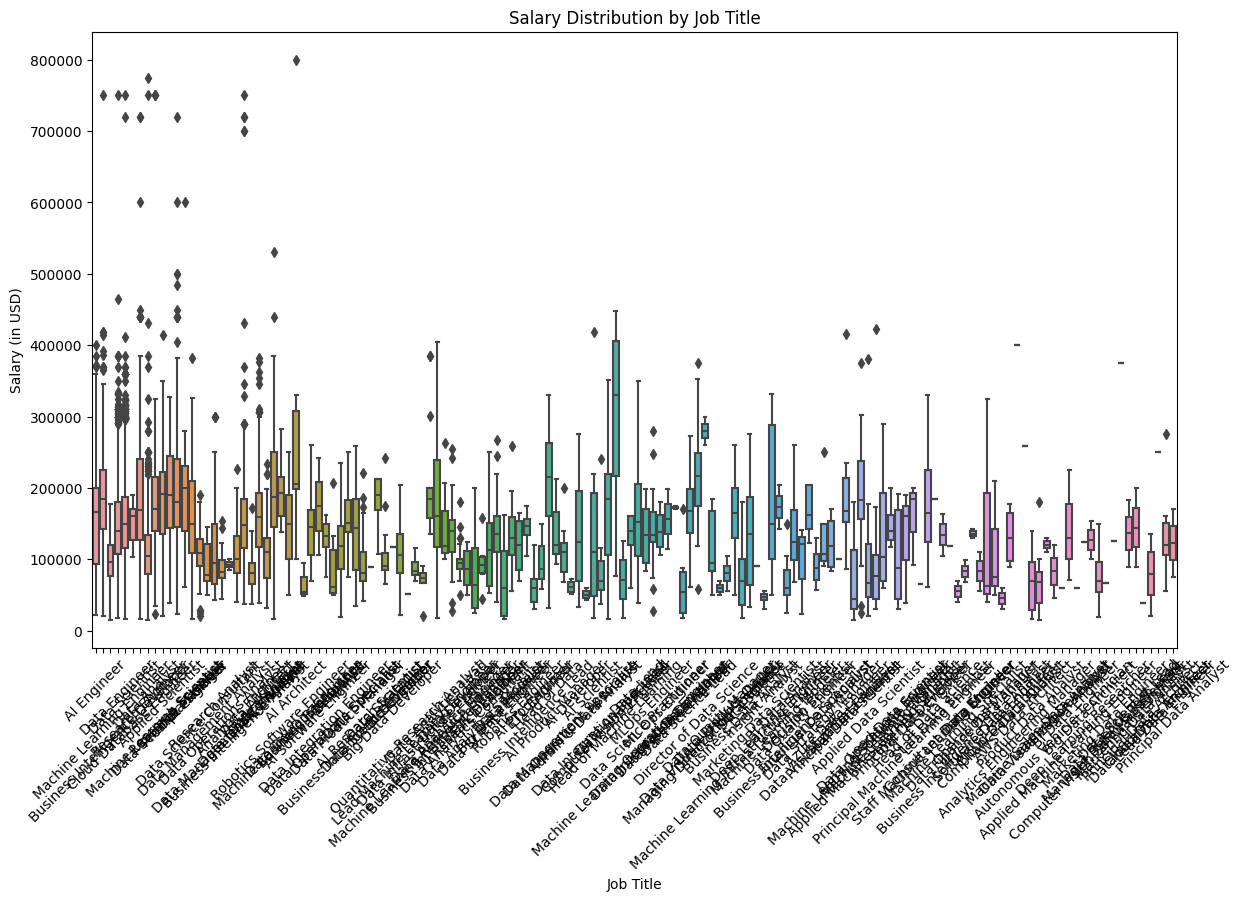

In [22]:
# Boxplot of salary by job title
plt.figure(figsize=(14, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=45)
plt.show()

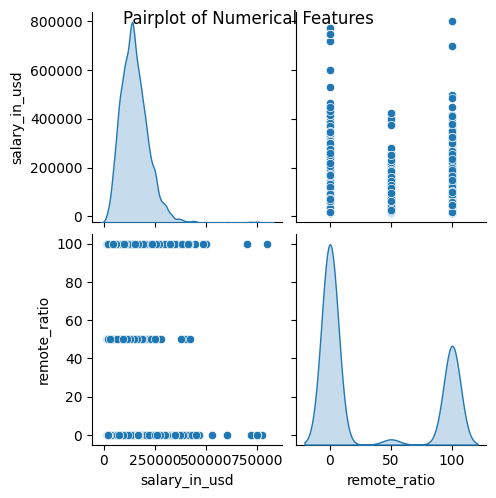

In [23]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[['salary_in_usd', 'remote_ratio', 'company_size']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

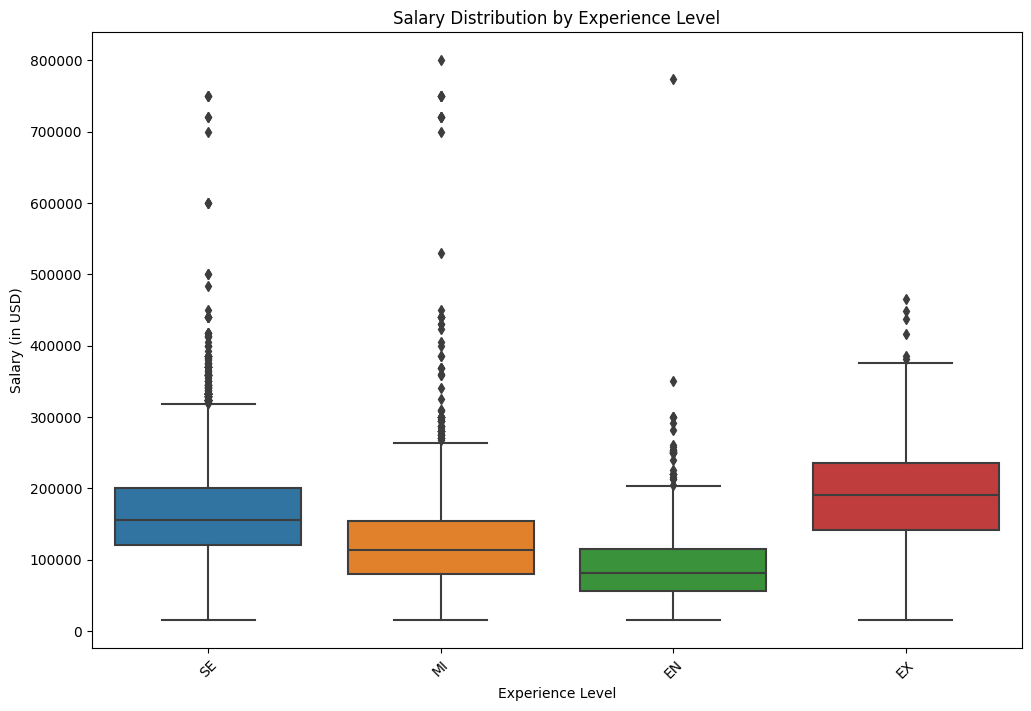

In [24]:
# Boxplot of salary by experience level
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=45)
plt.show()

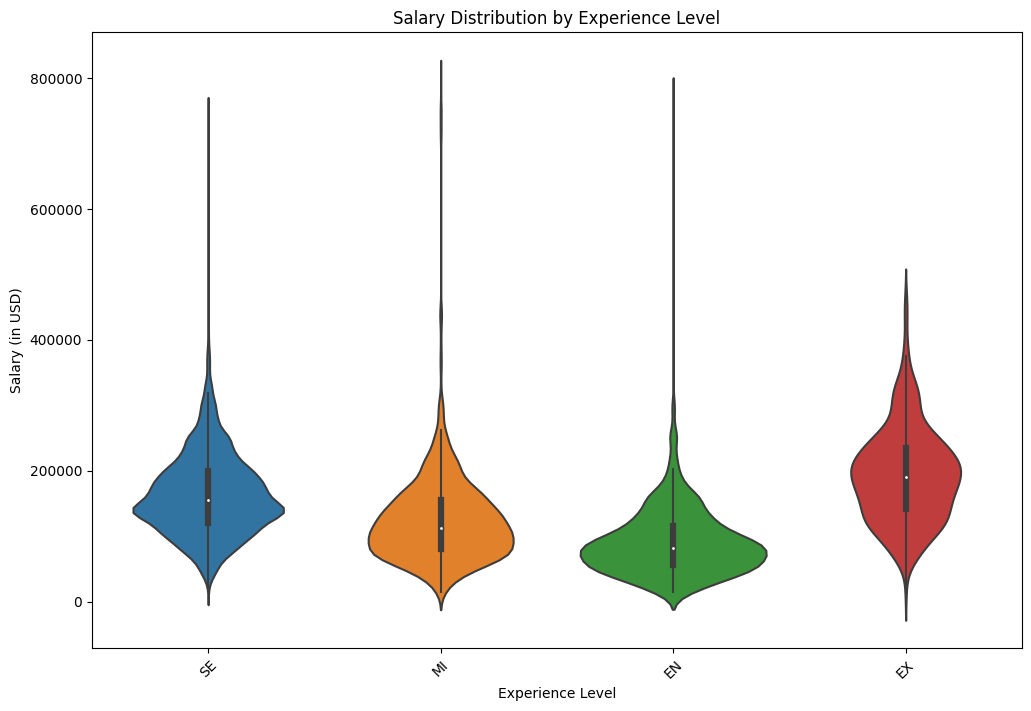

In [25]:
# Violin plot of salary by experience level
plt.figure(figsize=(12, 8))
sns.violinplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=45)
plt.show()

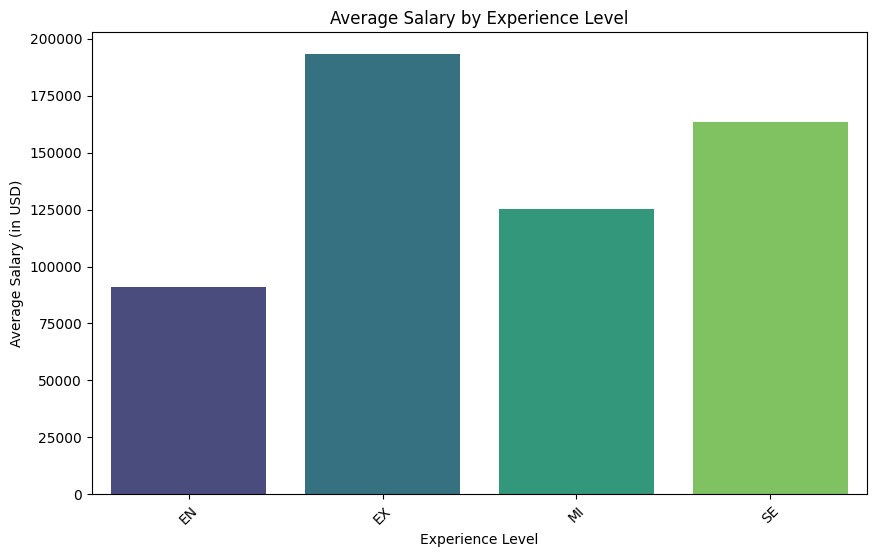

In [26]:
# Calculate average salary for each experience level
avg_salary_by_exp_level = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=avg_salary_by_exp_level, palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (in USD)')
plt.xticks(rotation=45)
plt.show()

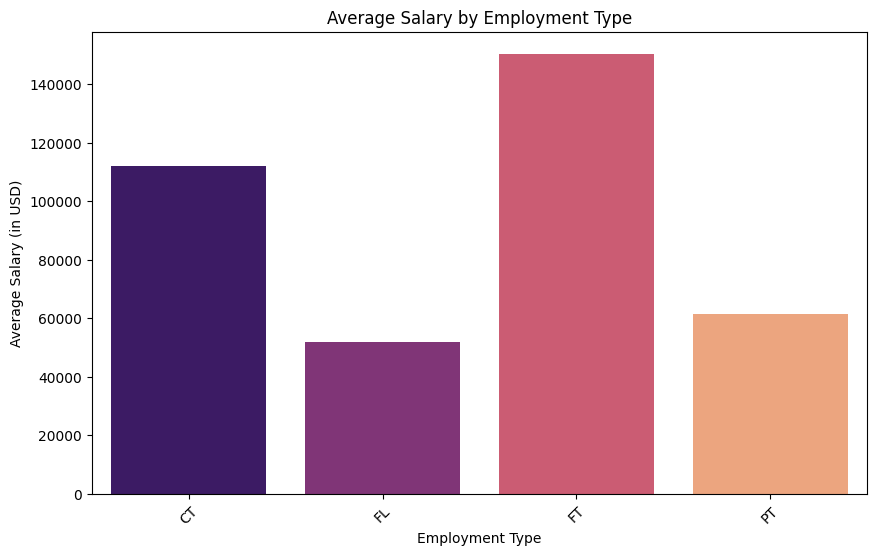

In [27]:
# Calculate average salary for each employment type
avg_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='salary_in_usd', data=avg_salary_by_employment, palette='magma')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (in USD)')
plt.xticks(rotation=45)
plt.show()

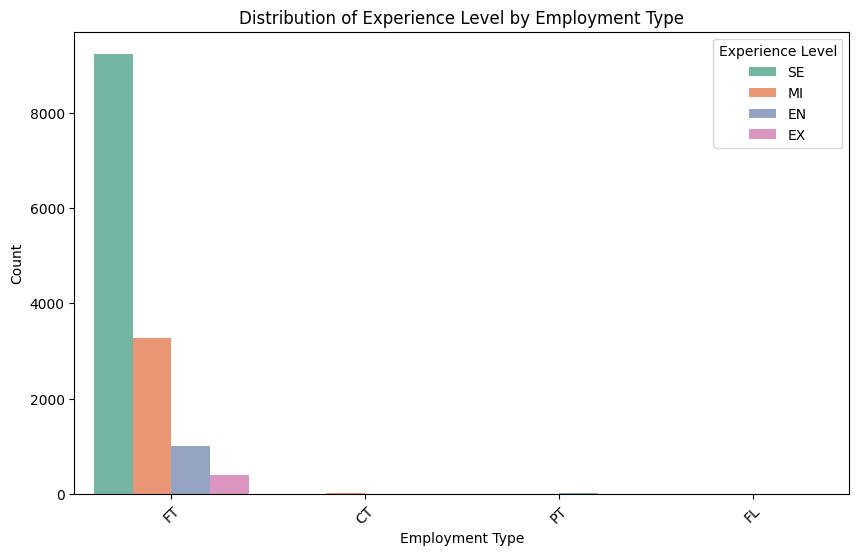

In [30]:
# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', hue='experience_level', data=df, palette='Set2')
plt.title('Distribution of Experience Level by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Experience Level')
plt.show()

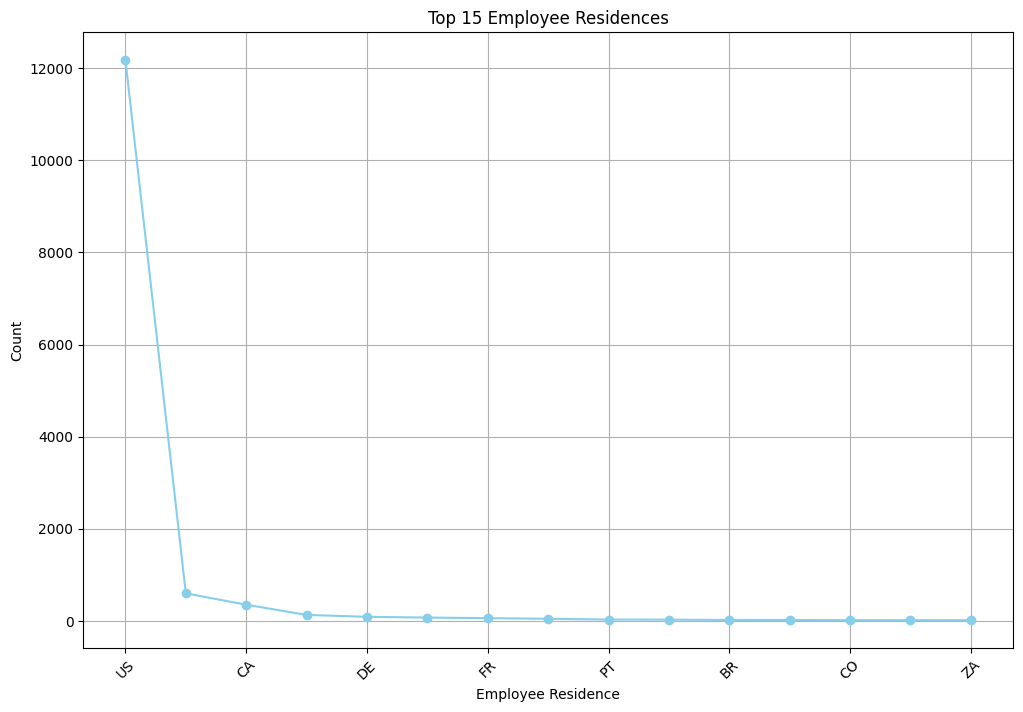

In [31]:
# Counting the occurrences of each employee residence
employee_residence_counts = df['employee_residence'].value_counts().head(15)

# Plotting the line chart
plt.figure(figsize=(12, 8))
employee_residence_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Top 15 Employee Residences')
plt.xlabel('Employee Residence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

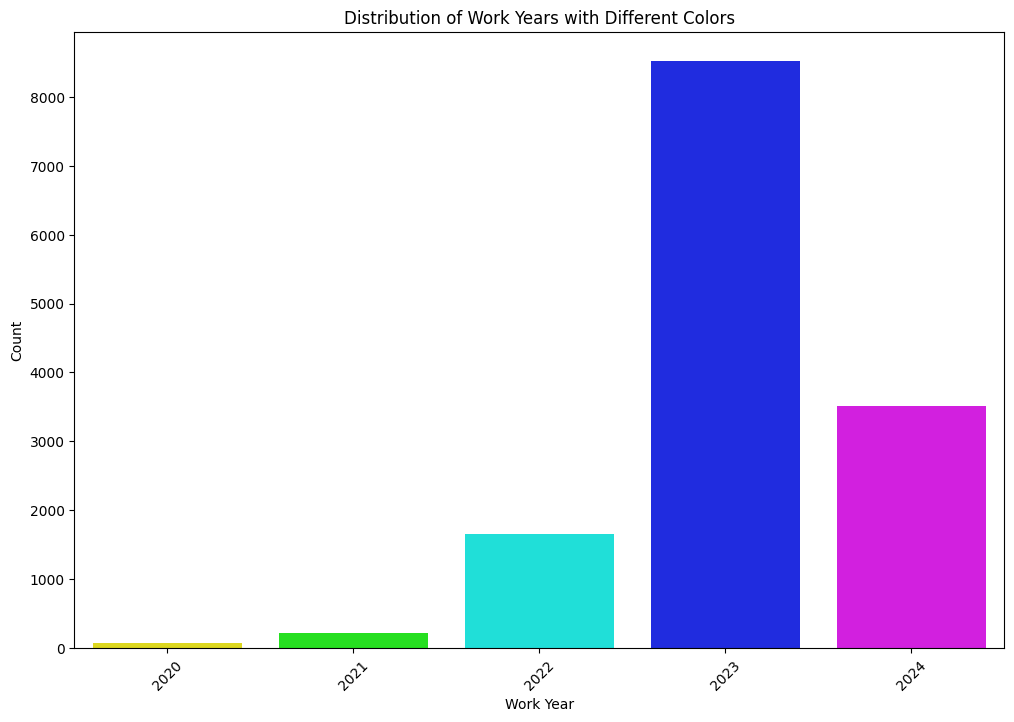

In [32]:
# Plotting the count plot with different colors for each work year
plt.figure(figsize=(12, 8))
sns.countplot(x='work_year', data=df, palette='hsv')
plt.title('Distribution of Work Years with Different Colors')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

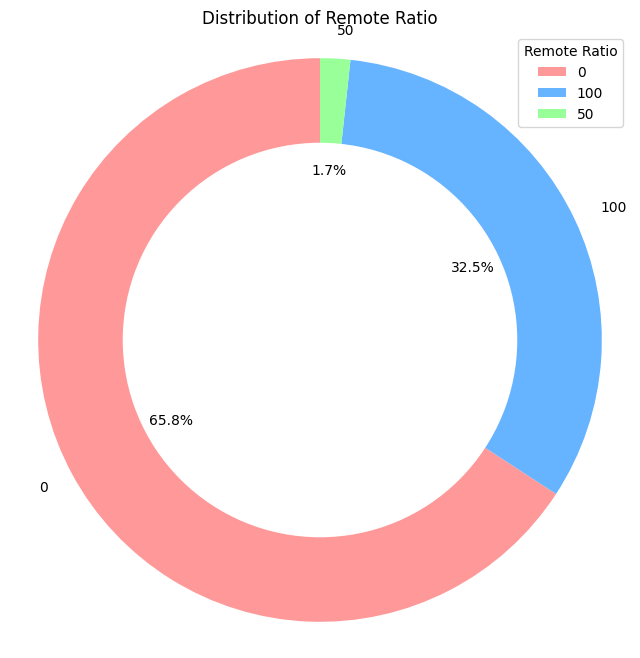

In [33]:
# Counting the occurrences of each remote ratio
remote_ratio_counts = df['remote_ratio'].value_counts()

# Creating the donut chart
plt.figure(figsize=(8, 8))
plt.pie(remote_ratio_counts, labels=remote_ratio_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Remote Ratio')
plt.legend(title='Remote Ratio', loc='upper right')
# Draw a circle in the center of the plot to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

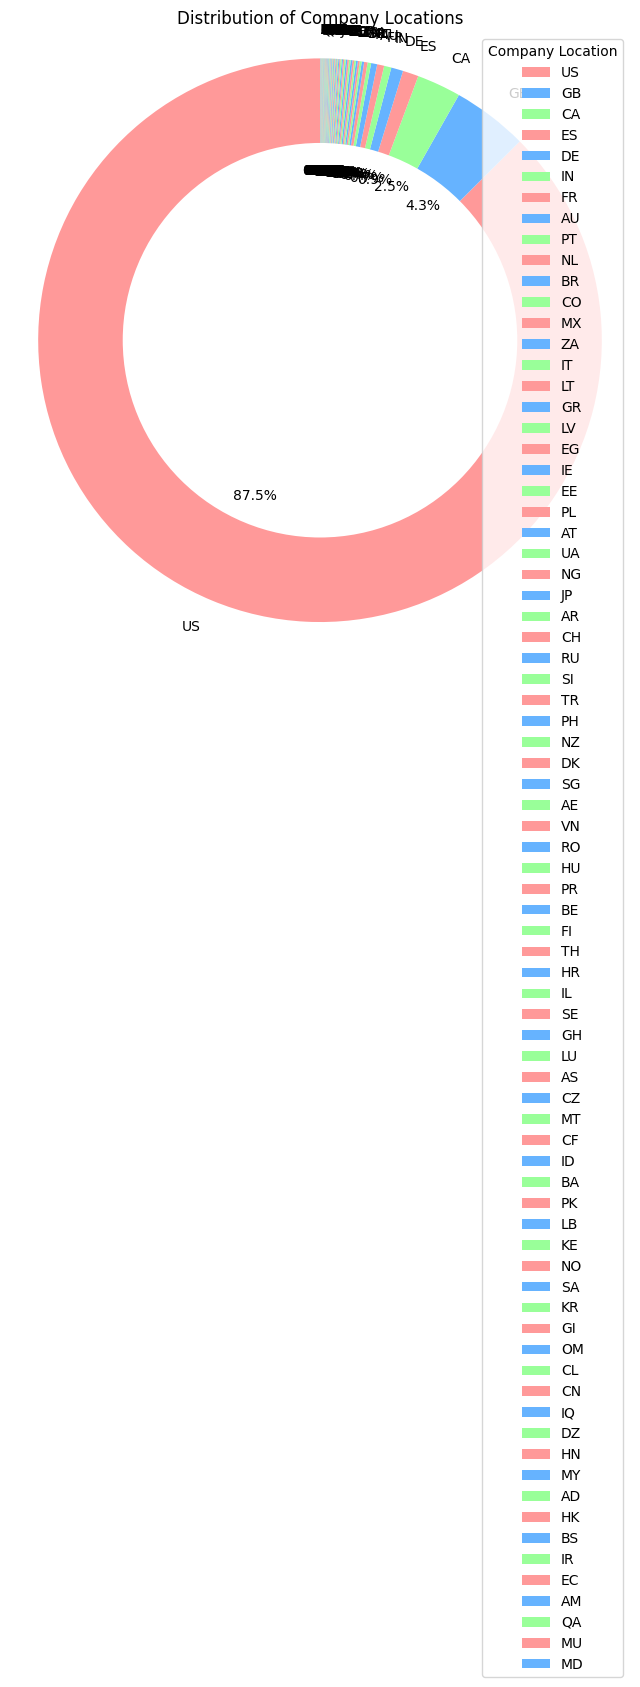

In [34]:
# Counting the occurrences of each company location
company_location_counts = df['company_location'].value_counts()

# Creating the donut chart
plt.figure(figsize=(8, 8))
plt.pie(company_location_counts, labels=company_location_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Company Locations')
plt.legend(title='Company Location', loc='upper right')

# Draw a circle in the center of the plot to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

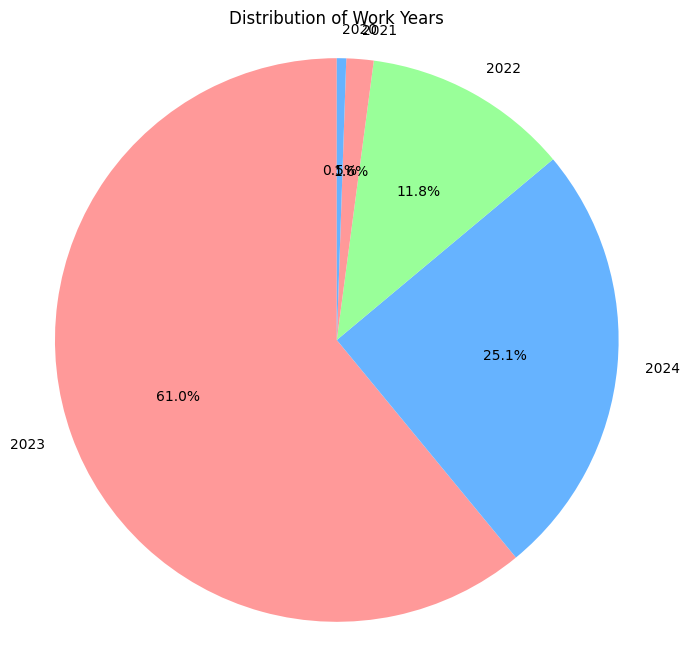

In [35]:
# Counting the occurrences of each work year
work_year_counts = df['work_year'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Work Years')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

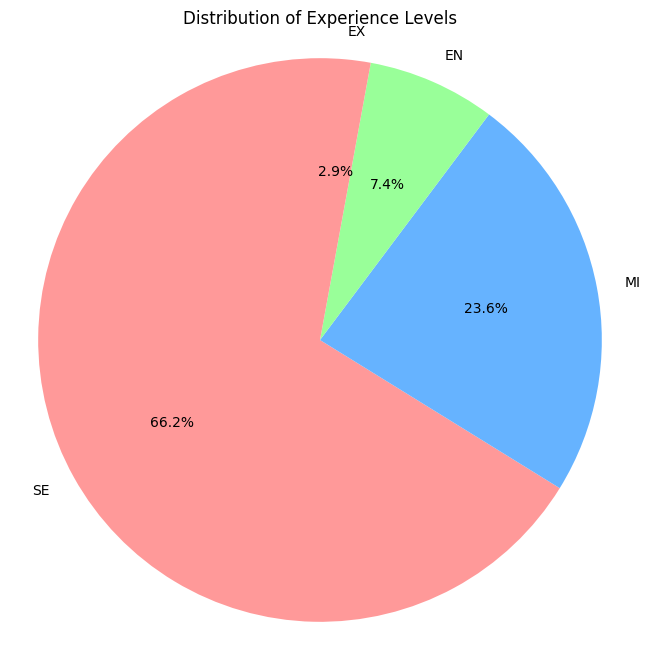

In [36]:
# Counting the occurrences of each experience level
experience_level_counts = df['experience_level'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(experience_level_counts, labels=experience_level_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Experience Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

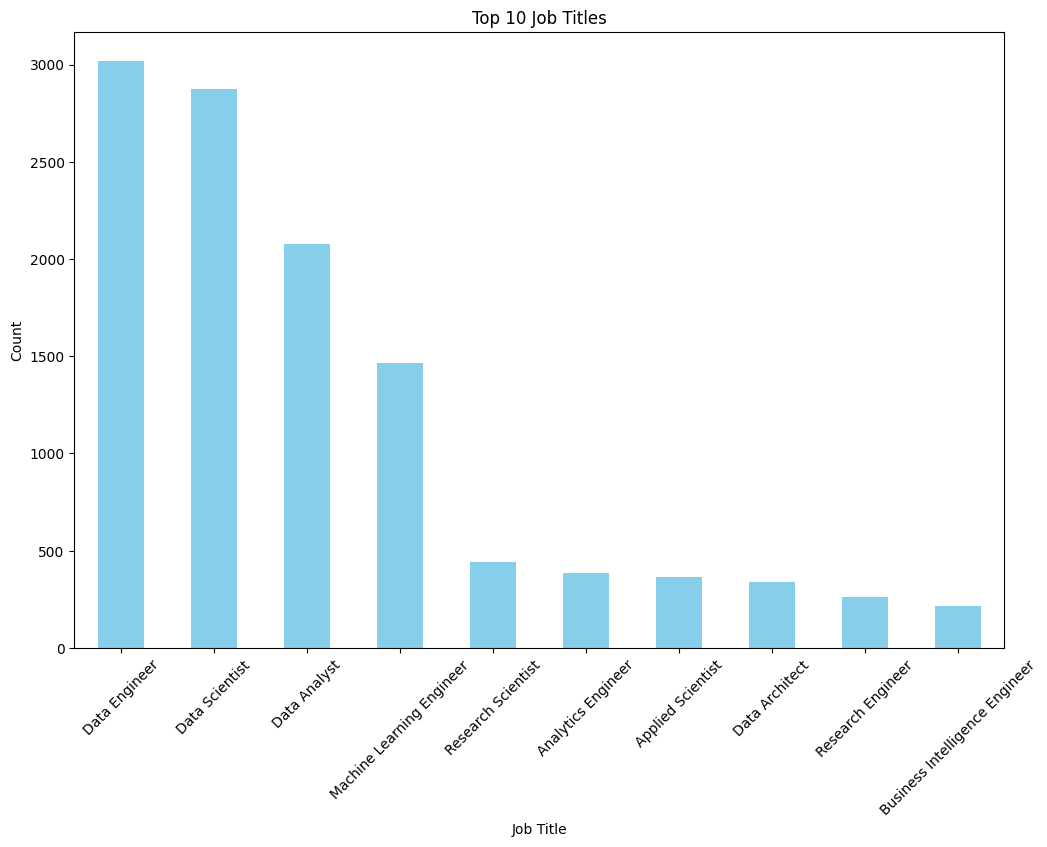

In [37]:
# Counting the occurrences of each job title
job_title_counts = df['job_title'].value_counts().head(10)

# Creating the bar plot
plt.figure(figsize=(12, 8))
job_title_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

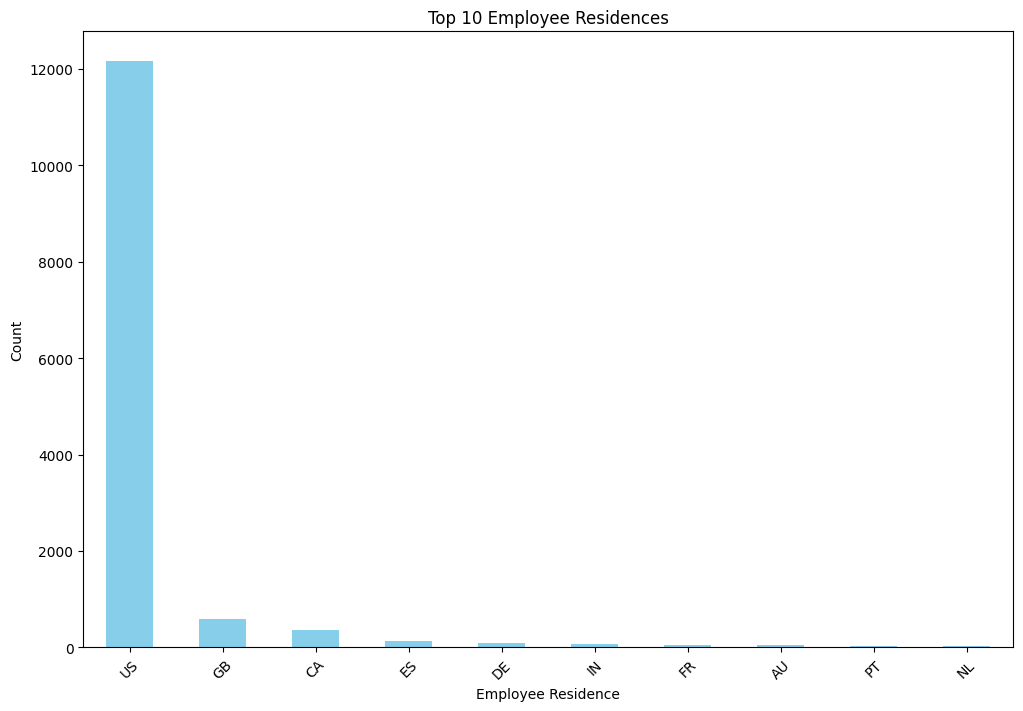

In [38]:
# Counting the occurrences of each employee residence
employee_residence_counts = df['employee_residence'].value_counts().head(10)

# Creating the bar plot
plt.figure(figsize=(12, 8))
employee_residence_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Employee Residences')
plt.xlabel('Employee Residence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

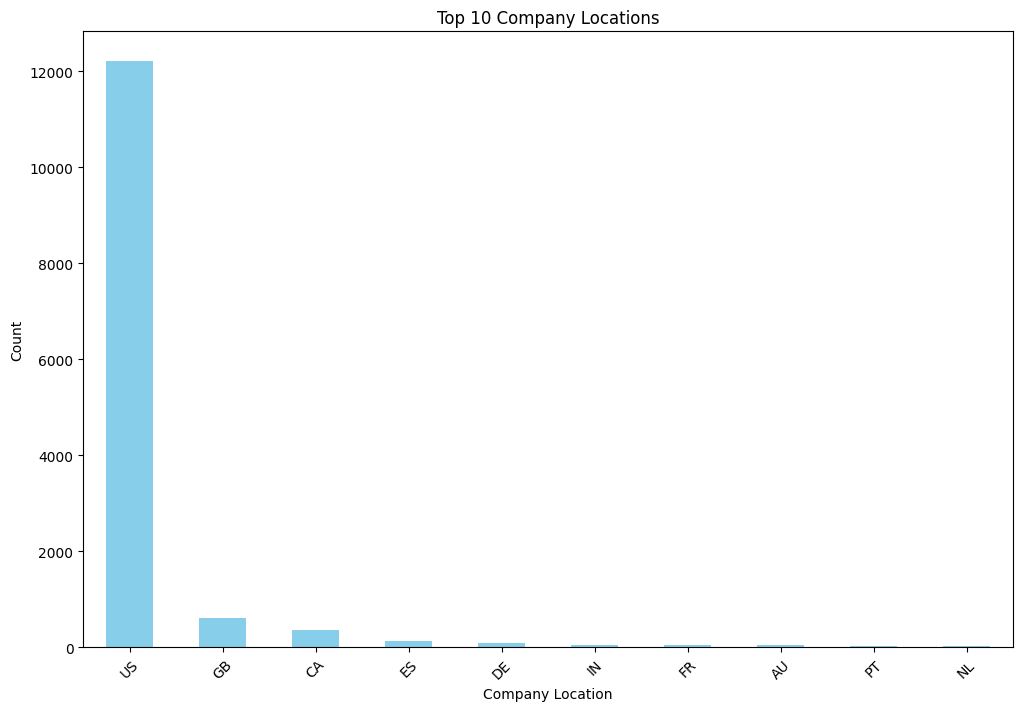

In [39]:
# Counting the occurrences of each company location
company_location_counts = df['company_location'].value_counts().head(10)

# Creating the bar plot
plt.figure(figsize=(12, 8))
company_location_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Company Locations')
plt.xlabel('Company Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

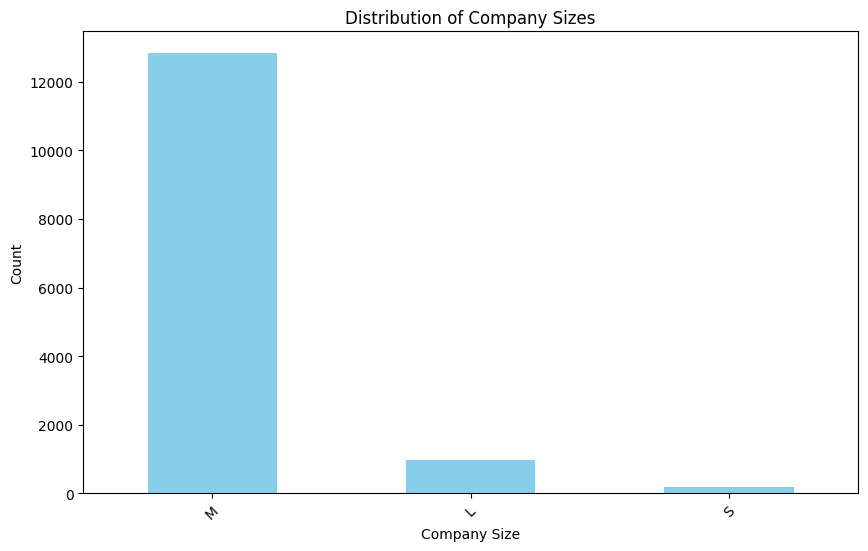

In [40]:
# Counting the occurrences of each company size
company_size_counts = df['company_size'].value_counts()

# Creating the bar plot
plt.figure(figsize=(10, 6))
company_size_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()